            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


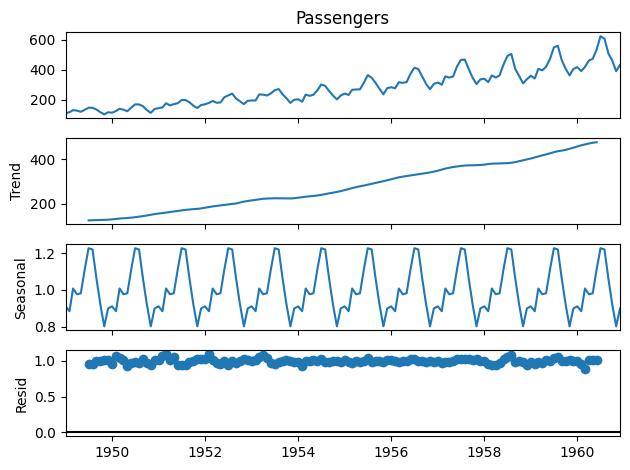

In [8]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
  
# Read the AirPassengers dataset 
airline = pd.read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', 
    index_col='Month', 
    parse_dates=True
) 
  
# (Optional) Print first few rows without triggering a second output
print(airline.head())  # You can also comment this out if not needed

# ETS Decomposition 
result = seasonal_decompose(airline['Passengers'], model='multiplicative') 
  
# ETS plot  
fig = result.plot()
plt.show()  # Ensure only one plot is shown

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Split data into train / test sets 
train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['Passengers'],
				order = (0, 1, 1), 
				seasonal_order =(2, 1, 1, 12)) 

result = model.fit() 
result.summary() 


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.013
Date:                            Mon, 05 May 2025   AIC                            896.027
Time:                                    10:55:40   BIC                            909.922
Sample:                                01-01-1949   HQIC                           901.669
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2980      0.077     -3.872      0.000      -0.449      -0.147
ar.S.L12       0.7126      0.236      3.025      0.002       0.251       1.174
ar.S.L24       0.2867      0.100      2.854      0.004       0.090       0.484
ma.S.L12      -0.9819      2.382     -0.412      0.680      -5.650       3.686
sigma2        87.8689    188.248      0.467      0.641    -281.090     456.828
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.86   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Month'>

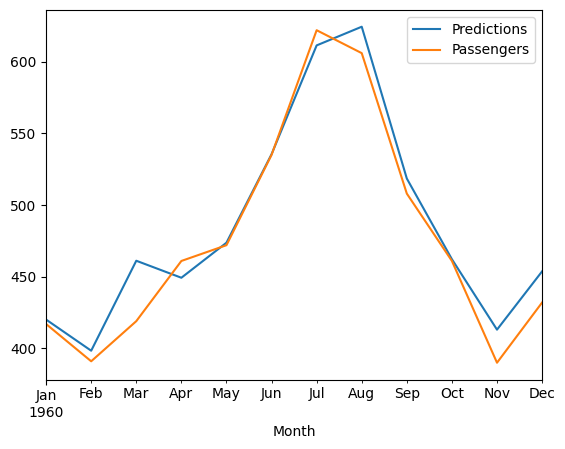

In [16]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Passengers'].plot(legend = True)

In [18]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error 
rmse(test["Passengers"], predictions) 

np.float64(17.202557217259848)

In [19]:
# Calculate mean squared error 
mean_squared_error(test["Passengers"], predictions) 

295.9279748130989

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Month'>

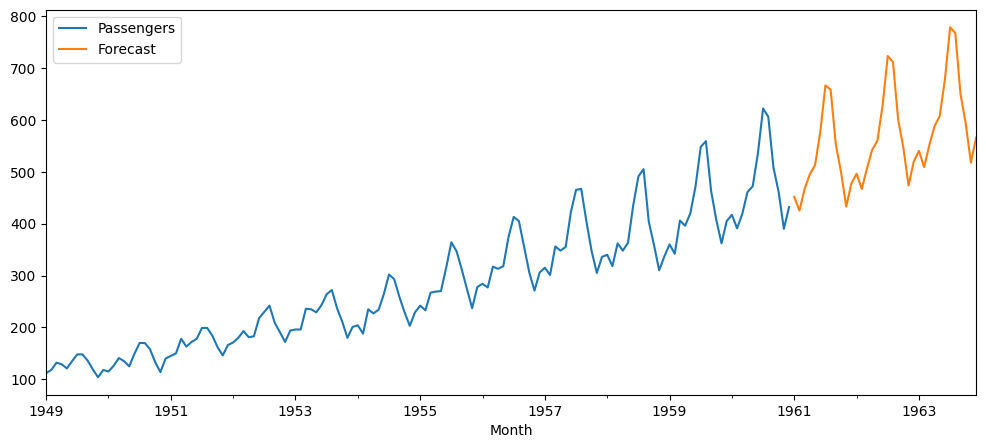

In [21]:
# Train the model on the full dataset 
model = model = SARIMAX(airline['Passengers'], 
						order = (0, 1, 1), 
						seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 

# Forecast for the next 3 years 
forecast = result.predict(start = len(airline), 
						end = (len(airline)-1) + 3 * 12, 
						typ = 'levels').rename('Forecast') 

# Plot the forecast values 
airline['Passengers'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 